<a href="https://colab.research.google.com/github/Tasneem3614/MSC_BIOINFORMATICS_506/blob/main/roadaccident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import string

In [3]:
!wget https://bitbucket.org/abdulwahed11314/accidents-data/raw/b7add9860d310171bca48bcaefeae37fe5157ac3/CasualtiesBig.csv

--2024-01-02 11:54:07--  https://bitbucket.org/abdulwahed11314/accidents-data/raw/b7add9860d310171bca48bcaefeae37fe5157ac3/CasualtiesBig.csv
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105848156 (101M) [text/plain]
Saving to: ‘CasualtiesBig.csv’

CasualtiesBig.csv   100%[===================>] 100.94M  72.1MB/s    in 1.4s    

2024-01-02 11:54:14 (72.1 MB/s) - ‘CasualtiesBig.csv’ saved [105848156/105848156]



In [4]:
!wget https://bitbucket.org/abdulwahed11314/accidents-data/raw/b7add9860d310171bca48bcaefeae37fe5157ac3/AccidentsBig.csv

--2024-01-02 11:57:10--  https://bitbucket.org/abdulwahed11314/accidents-data/raw/b7add9860d310171bca48bcaefeae37fe5157ac3/AccidentsBig.csv
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242719612 (231M) [text/plain]
Saving to: ‘AccidentsBig.csv’

AccidentsBig.csv    100%[===================>] 231.47M  89.8MB/s    in 2.6s    

2024-01-02 11:57:27 (89.8 MB/s) - ‘AccidentsBig.csv’ saved [242719612/242719612]



In [5]:
!wget https://bitbucket.org/abdulwahed11314/accidents-data/raw/b7add9860d310171bca48bcaefeae37fe5157ac3/VehiclesBig.csv

--2024-01-02 11:57:33--  https://bitbucket.org/abdulwahed11314/accidents-data/raw/b7add9860d310171bca48bcaefeae37fe5157ac3/VehiclesBig.csv
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203497645 (194M) [text/plain]
Saving to: ‘VehiclesBig.csv’

VehiclesBig.csv     100%[===================>] 194.07M  88.0MB/s    in 2.2s    

2024-01-02 11:57:47 (88.0 MB/s) - ‘VehiclesBig.csv’ saved [203497645/203497645]



In [53]:
df_accident_data=pd.read_csv("AccidentsBig.csv",index_col="Accident_Index")
print(df_accident_data.shape)
print(df_accident_data.head())

df_vehicle_data=pd.read_csv("VehiclesBig.csv",error_bad_lines=False,index_col="Accident_Index",warn_bad_lines=False)
print(df_vehicle_data.shape)
print(df_vehicle_data.head())

df_casualties_data=pd.read_csv("CasualtiesBig.csv",error_bad_lines=False,index_col="Accident_Index",warn_bad_lines=False)
print(df_casualties_data.shape)
print(df_casualties_data.head())

(1780653, 31)
                Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
Accident_Index                                                             
200501BS00001                525680.0                178240.0  -0.191170   
200501BS00002                524170.0                181650.0  -0.211708   
200501BS00003                524520.0                182240.0  -0.206458   
200501BS00004                526900.0                177530.0  -0.173862   
200501BS00005                528060.0                179040.0  -0.156618   

                 Latitude  Police_Force  Accident_Severity  \
Accident_Index                                               
200501BS00001   51.489096             1                  2   
200501BS00002   51.520075             1                  3   
200501BS00003   51.525301             1                  3   
200501BS00004   51.482442             1                  3   
200501BS00005   51.495752             1                  3   

                Nu

In [54]:
df_accident_data=df_accident_data.iloc[0:10000,:]
df_vehicle_data=df_vehicle_data.iloc[0:10000,:]
df_casualties_data=df_casualties_data.iloc[0:10000,:]

In [55]:
# df_accident_data=df_accident_data.join(df_vehicle_data, how='Outer')
df_accident_data = df_accident_data.join(df_vehicle_data, how='outer')
print(df_accident_data.shape)

(14120, 52)


In [56]:
''' df_accident_data
df_vehicle_data
df_casualties_data '''


' df_accident_data\ndf_vehicle_data\ndf_casualties_data '

In [57]:
df_accident_data.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
     

In [58]:
df_casualties_data.columns

Index(['Vehicle_Reference', 'Casualty_Reference', 'Casualty_Class',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty',
       'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement',
       'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type'],
      dtype='object')

In [59]:
#combining two columns
# df_accident_data['Date_time']=df_accident_data['Date']+' '+df_accident_data['Time']

# for ll in df_accident_data.columns:
#   df_accident_data=(df_accident_data[df_accident_data[11]]!= -1)

# for ll in df_casualties_data.columns:
#   df_accident_data=(df_casualties_data[df_casualties_data[11]]!= -1)

# df_accident_data['Date_time']=pd.to_datetime(df_accident_data.Date_time)
# df_accident_data.drop(['Date','Time'],axis=1,inplace=True)
# df_accident_data.dropna(inplace=True)


#combining two columns
df_accident_data['Date_time']=df_accident_data['Date']+' '+df_accident_data['Time']

# for ll in df_accident_data.columns:
  # df_accident_data=(df_accident_data[df_accident_data['Location_Easting_OSG (m)']!= -1])

for ll in df_accident_data.columns:
  df_accident_data=(df_accident_data[df_accident_data['Date']!= -1])
# for ll in df_casualties_data.columns:
#   df_accident_data=(df_casualties_data[df_casualties_data['Date']!= -1])

df_accident_data['Date_time']=pd.to_datetime(df_accident_data.Date_time)
df_accident_data.drop(['Date','Time'],axis=1,inplace=True)
df_accident_data.dropna(inplace=True)

In [60]:
df_accident_data

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Date_time
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,3,12,...,15.0,2.0,74.0,10.0,-1.0,-1.0,-1.0,7.0,1.0,2005-04-01 17:42:00
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,4,12,...,1.0,1.0,42.0,7.0,8268.0,2.0,3.0,-1.0,-1.0,2005-05-01 17:36:00
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,5,12,...,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0,2005-06-01 00:15:00
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,5,12,...,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0,2005-06-01 00:15:00
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,6,12,...,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0,2005-07-01 10:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200501HT20453,536950.0,183520.0,-0.026892,51.533928,1,3,4,1,1,5,...,15.0,2.0,42.0,7.0,1590.0,1.0,12.0,-1.0,-1.0,2005-07-17 21:02:00
200501HT20454,535290.0,181750.0,-0.051490,51.518422,1,3,1,1,2,5,...,15.0,1.0,23.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,2005-07-18 00:50:00
200501HT20455,538160.0,180960.0,-0.010461,51.510629,1,3,2,1,1,5,...,15.0,2.0,34.0,6.0,-1.0,-1.0,-1.0,2.0,1.0,2005-07-17 22:44:00


Text(0.5, 0, '0-Sunday, 1-Monday, 2-Tuesday,3-Wednesday,4-Thursday,5-Friday,6-Saturday')

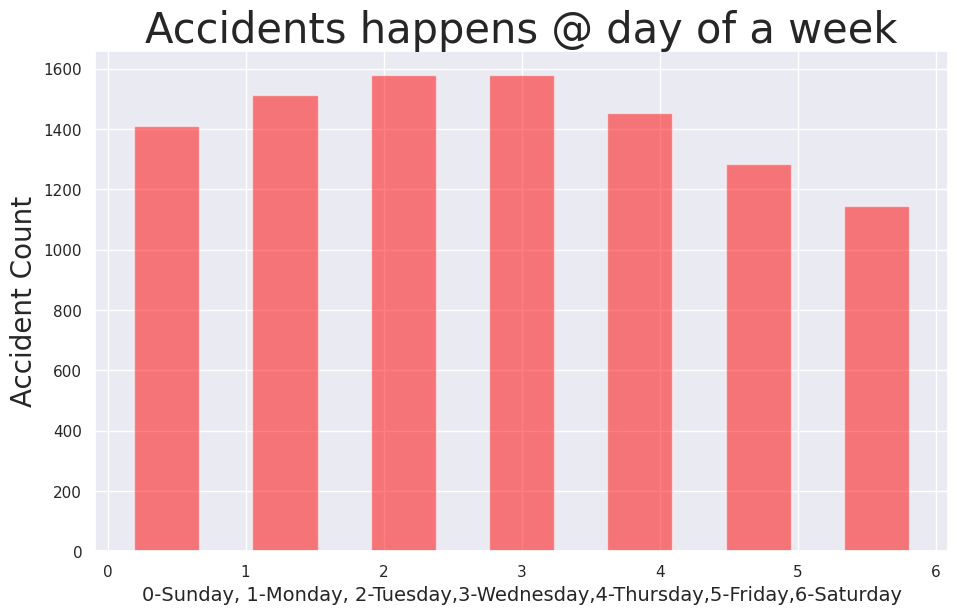

In [61]:
plt.figure(figsize=(11,6.5))
df_accident_data.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5,color='red')
plt.title('Accidents happens @ day of a week',fontsize=30)
plt.grid(True)
plt.ylabel('Accident Count',fontsize=20)
plt.xlabel('0-Sunday, 1-Monday, 2-Tuesday,3-Wednesday,4-Thursday,5-Friday,6-Saturday',fontsize=14)

Text(0.5, 0, 'Accident Count')

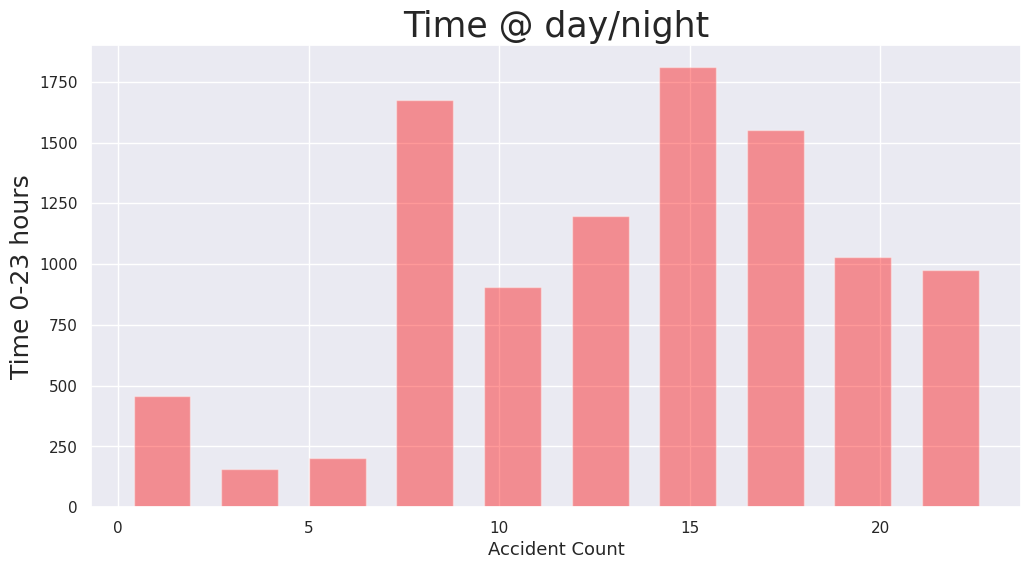

In [62]:
plt.figure(figsize=(12,6))
df_accident_data.Date_time.dt.hour.hist(rwidth=0.65,alpha=0.40,color='red')
plt.title('Time @ day/night',fontsize=25)
plt.grid(True)
plt.ylabel('Time 0-23 hours',fontsize=18)
plt.xlabel('Accident Count',fontsize=13)

<Axes: >

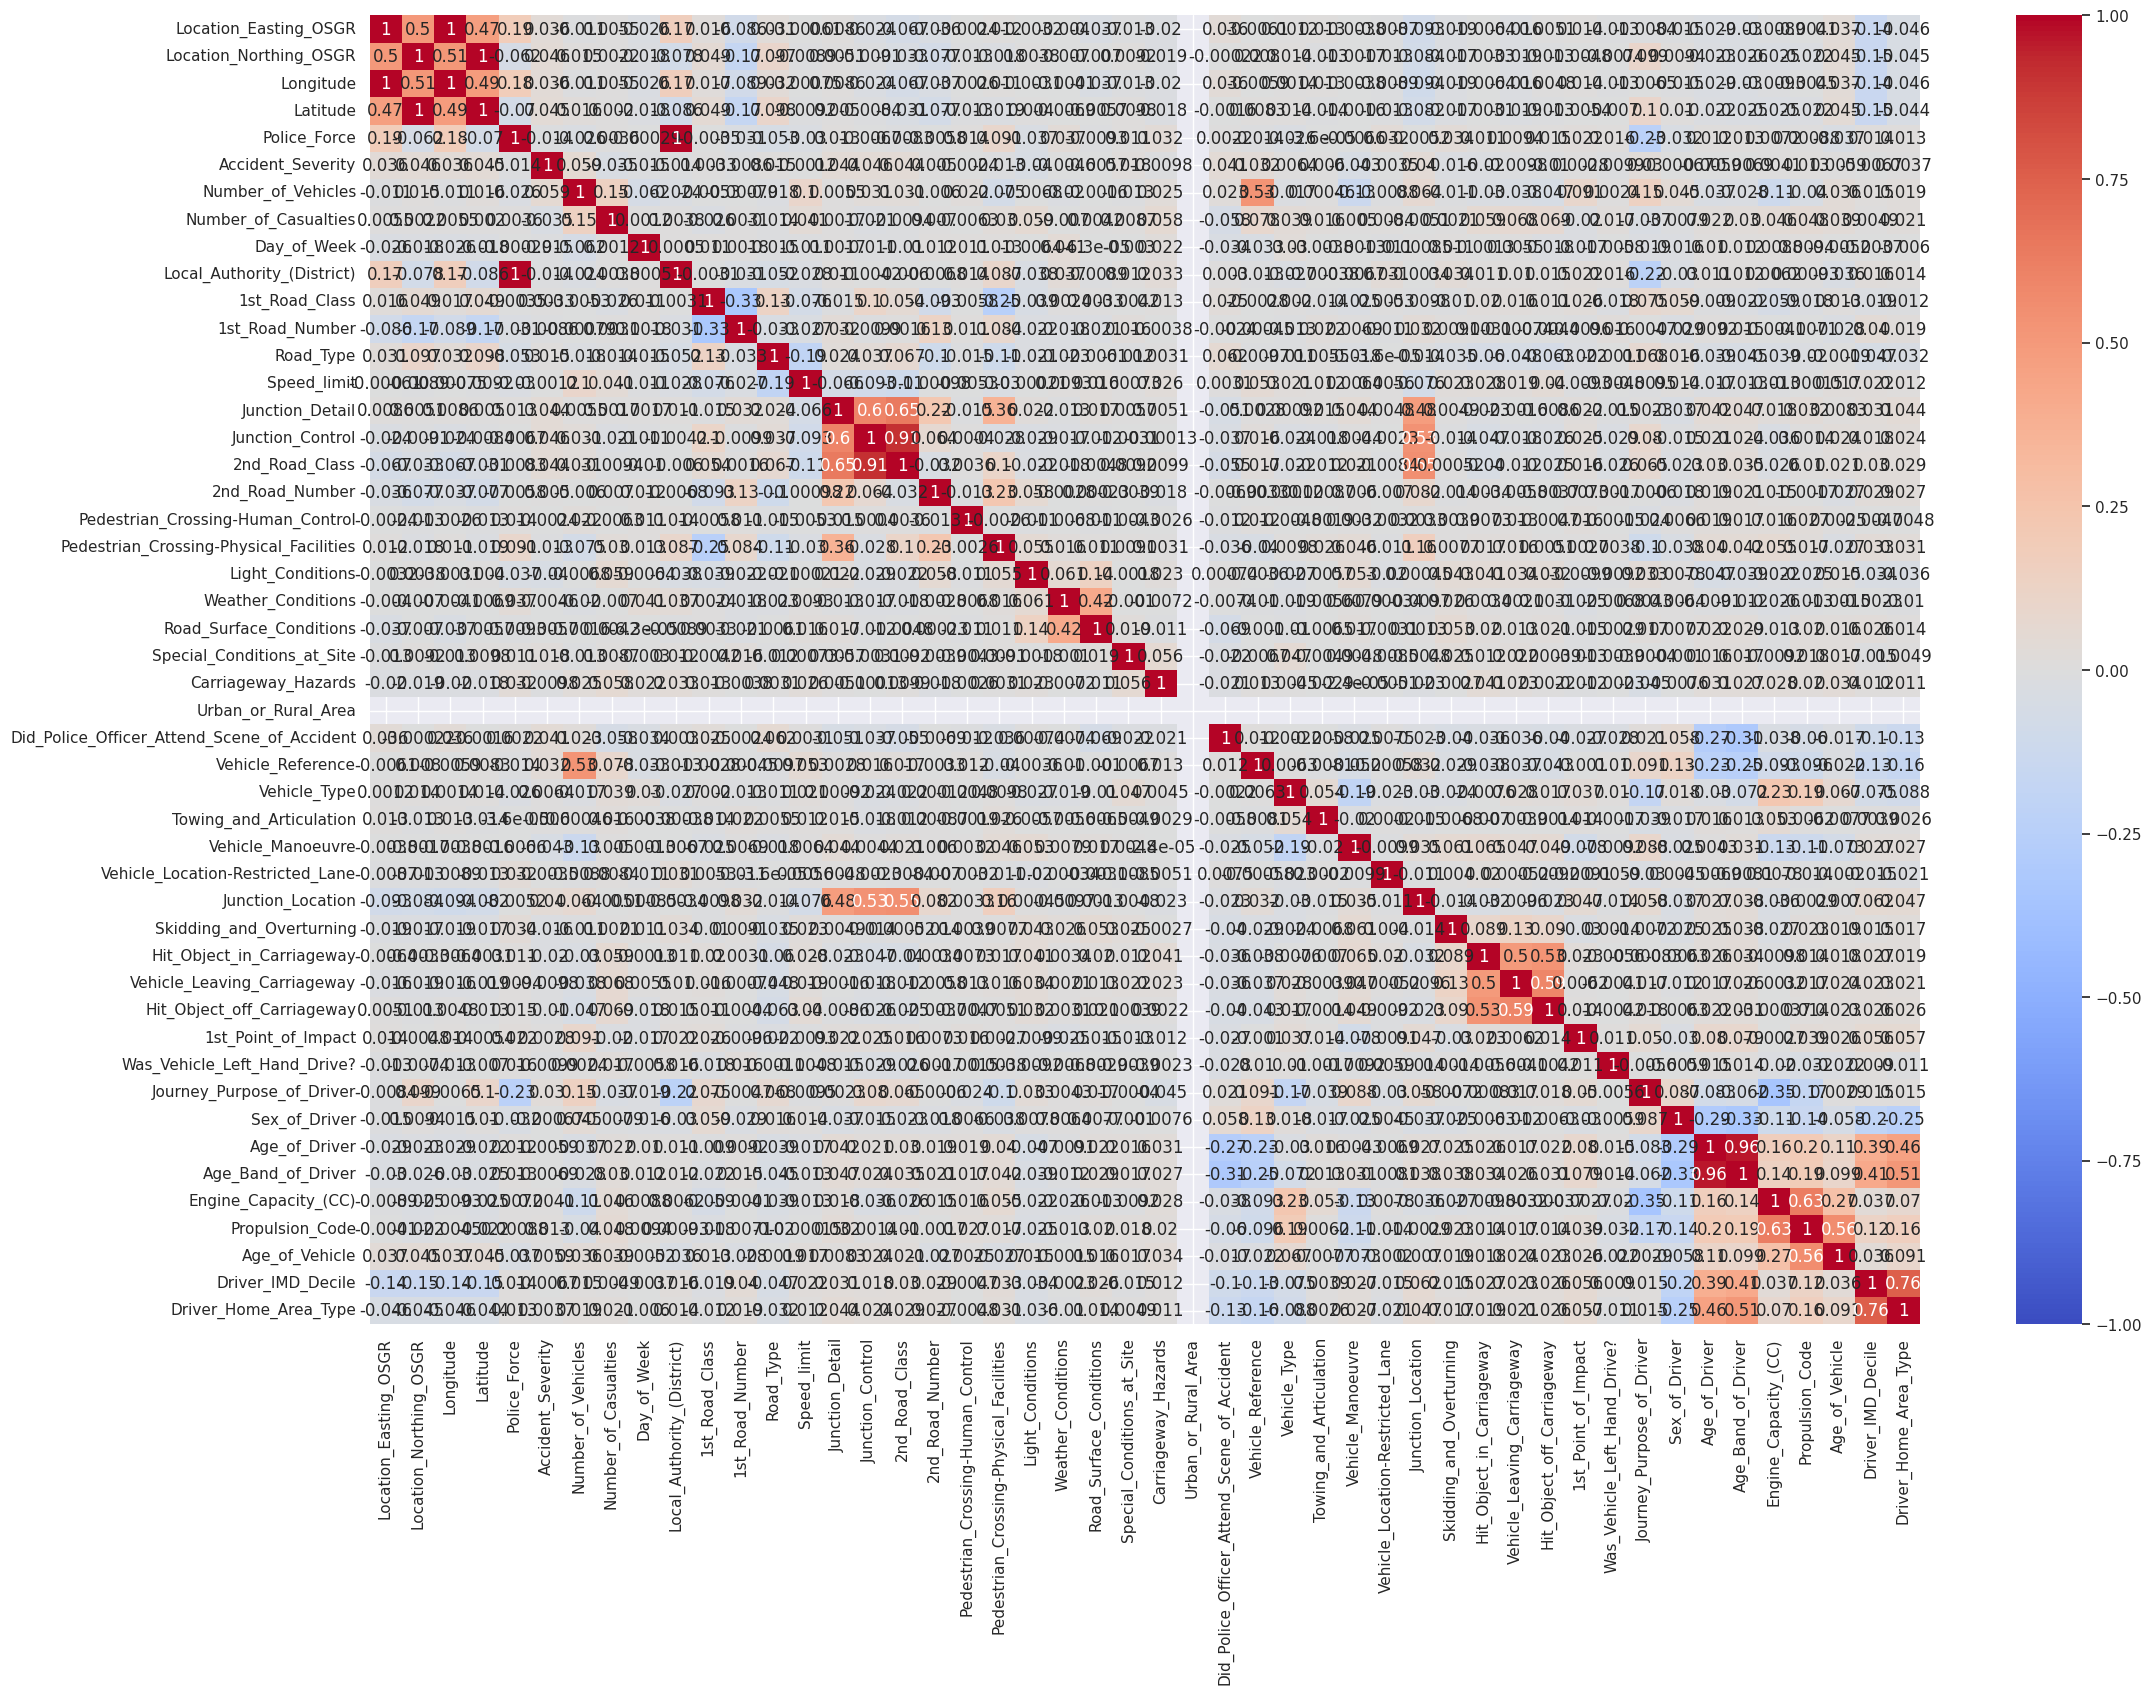

In [63]:
corr_data = df_accident_data.corr()
%matplotlib inline
sns.set(rc={'figure.figsize': (25, 17)})
sns.heatmap(corr_data, annot=True, vmin=-1, vmax=1, cmap='coolwarm')



In [64]:
sns.countplot(x=df_vehicle_data['Number_of_Vehicles'],data=df_vehicle_data)


KeyError: ignored

In [65]:
df_vehicle_data.columns

Index(['Vehicle_Reference', 'Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', '1st_Point_of_Impact',
       'Was_Vehicle_Left_Hand_Drive?', 'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_of_Driver', 'Age_Band_of_Driver',
       'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type'],
      dtype='object')

<Axes: xlabel='Age_of_Vehicle', ylabel='count'>

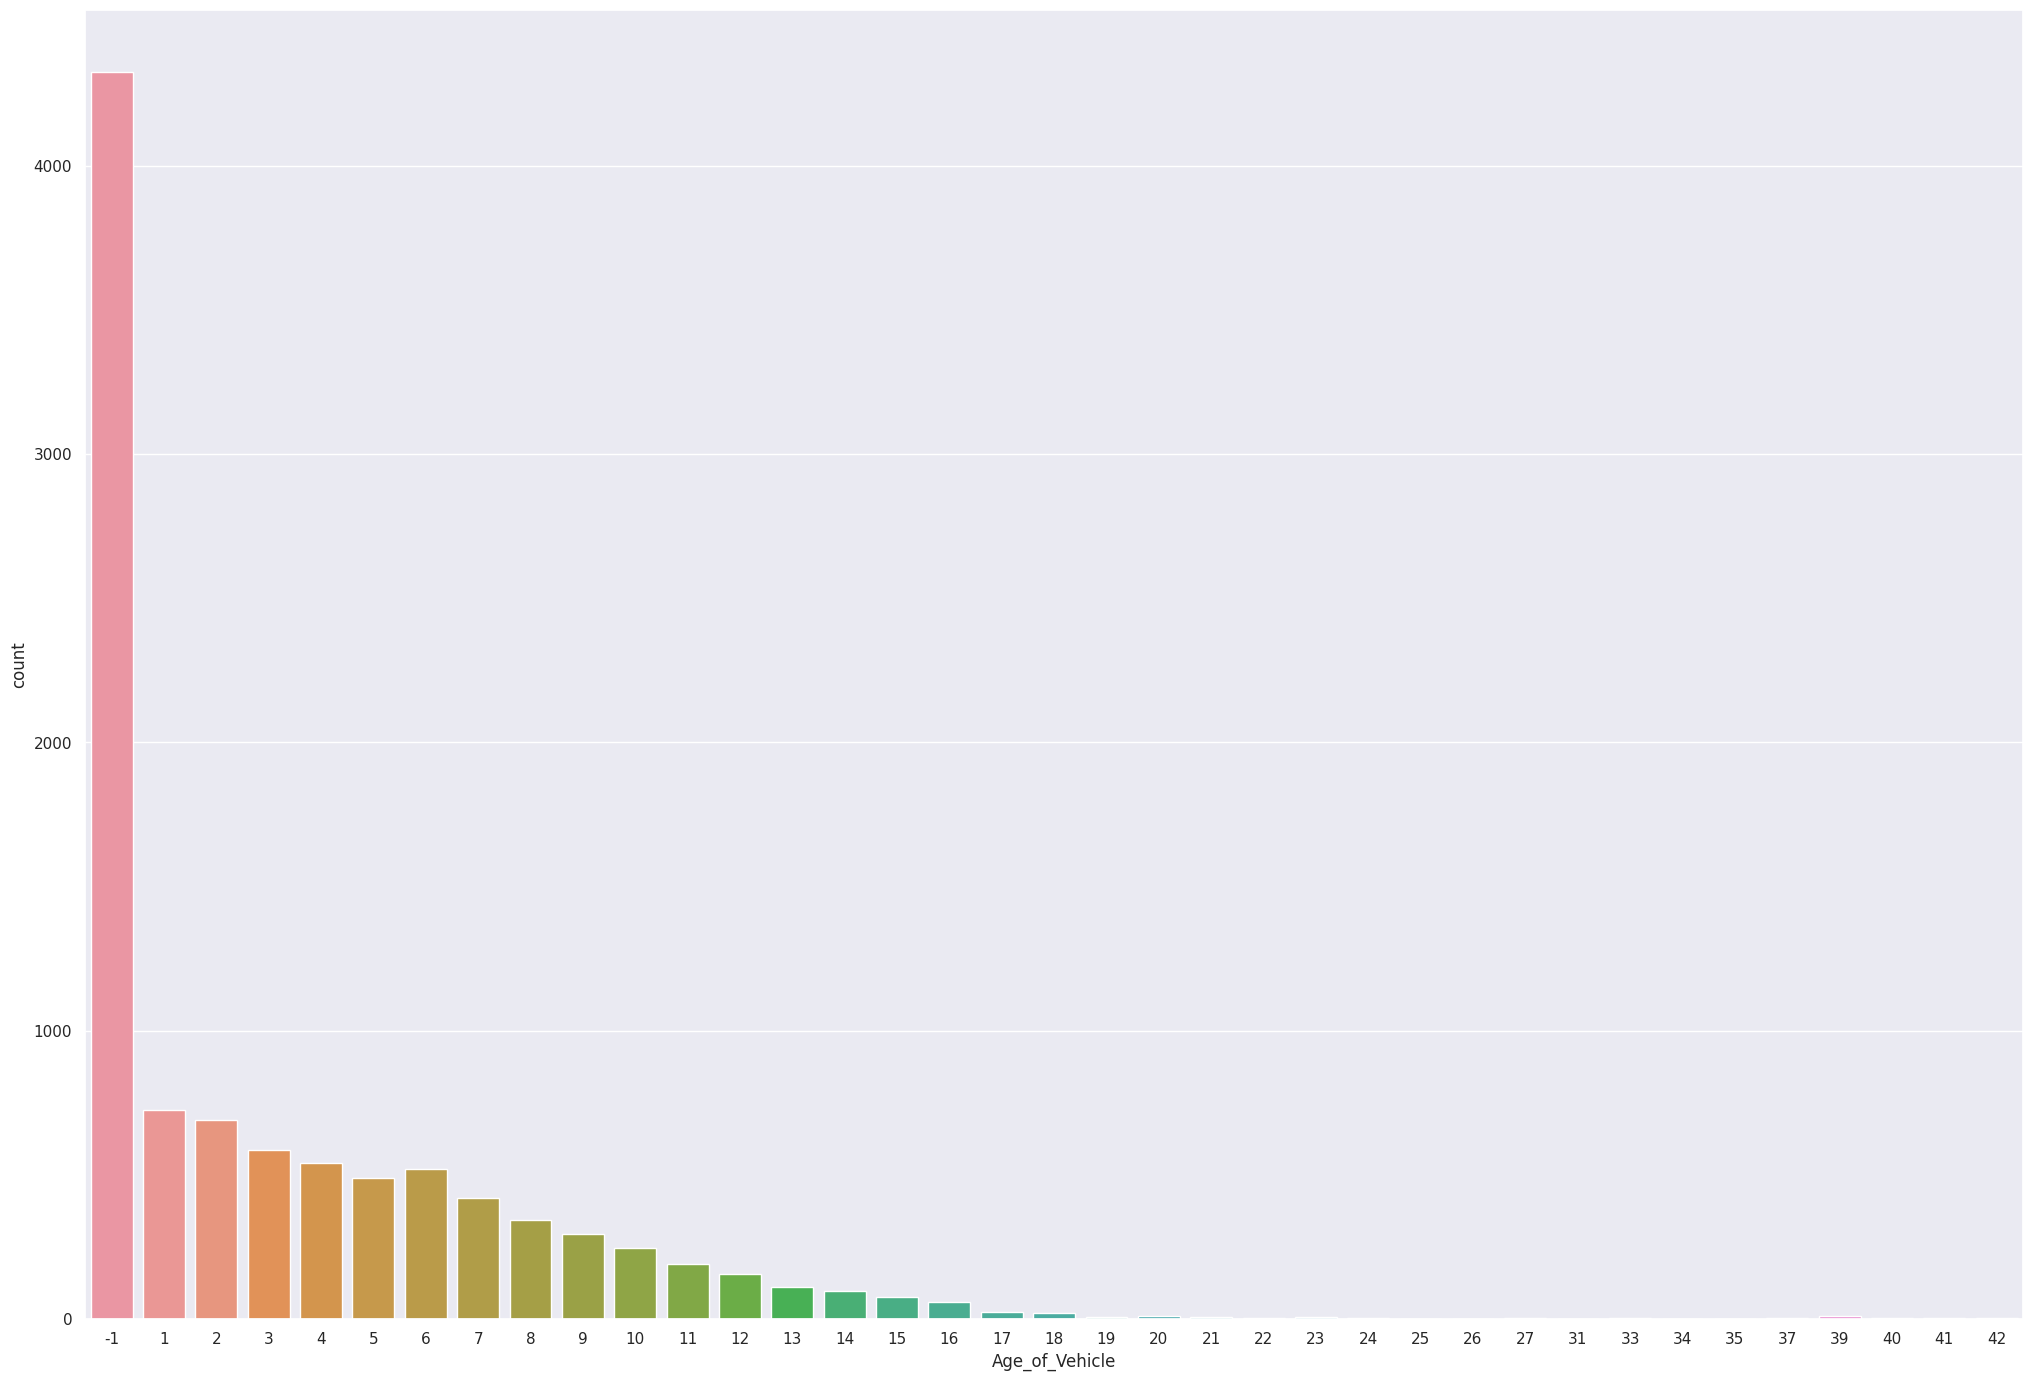

In [66]:
sns.countplot(x=df_vehicle_data['Age_of_Vehicle'],data=df_vehicle_data)


In [67]:
df_accident_data['Age_of_Driver']=np.log(df_accident_data['Age_of_Driver'])
df_accident_data['Age_of_Vehicle']=np.log(df_accident_data['Age_of_Vehicle'])


In [69]:
df_casualties_data.columns

Index(['Vehicle_Reference', 'Casualty_Reference', 'Casualty_Class',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty',
       'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement',
       'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type'],
      dtype='object')

In [70]:
df_vehicle_data.columns

Index(['Vehicle_Reference', 'Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', '1st_Point_of_Impact',
       'Was_Vehicle_Left_Hand_Drive?', 'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_of_Driver', 'Age_Band_of_Driver',
       'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type'],
      dtype='object')

In [71]:
df_accident_data.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leavi

In [72]:
from sklearn.model_selection import train_test_split


In [77]:
accident_data=df_accident_data.drop('Accident_Severity', axis=1)
accident_data=df_accident_data[['Age_of_Driver','Vehicle_Type','Engine_Capacity_(CC)','Day_of_Week','Weather_Conditions','Light_Conditions','Sex_of_Driver','Speed_limit']]
accident_data.head()

X_train,X_test,y_train,y_test=train_test_split(accident_data.values,df_accident_data['Accident_Severity'].values,test_size=0.3,random_state=99)
display("for traning")
print(X_train.shape,y_train.shape)
display("for traning")
print(X_test.shape,y_test.shape)



'for traning'

(6976, 8) (6976,)


'for traning'

(2990, 8) (2990,)


In [78]:
model_names=[]
feature_counts=[]
model_acc_scores=[]
model_prc_scores=[]
model_rec_scores=[]
model_f1_scores=[]

In [81]:
# from sklearn.ensemble import RandomForestClassifier as RFC
# from sklearn.tree import DecisionTreeClassifier as DTC
# from sklearn.naive_bayes import GaussianNB as NBC
# from sklearn.linear_model import LogisticRegression as LR
# from sklearn.linear_model import SGDClassifier as SDC
# from sklearn.neighbors import KNeighborsClassifier as KNN
# from sklearn.svm import SVC
# from sklearn.matrics import accuracy_score,balanced_accuracy_score,recall_score,f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as NBC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import SGDClassifier as SDC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,balanced_accuracy_score,recall_score,f1_score,classification_report

In [ ]:
rfc_model_1 = RFC(random_state=0,n_estimators=200)
rfc_model_1.fit(X_train, y_train)
rfc_model_1_y_hat = rfc_model_1.predict(X_test)
print(rfc_model_1.score(X_test, y_test))
model_names.append('rfc_model_1')
feature_counts.append(X_train.shape[1])
model_acc_scores.append(accuracy_score(y_test, rfc_model_1_y_hat))
model_prc_scores.append(precision_score(y_test, rfc_model_1_y_hat, average='micro'))
model_rec_scores.append(recall_score(y_test, rfc_model_1_y_hat, average='micro')) model_f1_scores.append(f1_score(y_test, rfc_model_1_y_hat, average-'micro'))
acc_RF = round(rfc_model_1.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
digits=6,
y_true-y_test,
y_pred=rfc_model_1_y_hat)
print("Accuracy", acc_RF)
print(sk_report)
pd.crosstab(y_test, rfc_model_1_y_hat, rownames=['Actual'], colnames=['Predicted'], margins=True)